First of all, import AlphaFoldXplore and load up your .afxt file on a variable like this.

In [1]:
import alphafoldxplore as afx
result = afx.load("20220920132916.afxt")

For best results install AlphaFoldXplore on a Colab machine.


```result``` now contains a dictionary with as many entries as proteins you had on the .afxt file.
You can then store some keys of the returning dictionary on some other variables for easy access.

In [2]:
p1 = result['p1']
p2 = result['p2']

Let's start actually exploring the results now.
For starters, you can check the predictions' molecular weight to have an idea on its size.

(Ignore the parser warnings, those are non-impactful)

In [20]:
mw = p1.get_molecular_weight()

21424.299400000004


/Users/juanignacio/opt/anaconda3/envs/test/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1503
  warnings.warn(
/Users/juanignacio/opt/anaconda3/envs/test/lib/python3.9/site-packages/Bio/SeqIO/PdbIO.py:303: BiopythonParserWarning: 'HEADER' line not found; can't determine PDB ID.
  warnings.warn(


And (if you're not viewing this notebook on Colab) you can view the actual shape of the protein prediction.

In [12]:
p1.view()

NGLWidget()

The neat aspect of this function is that you can add an aditional protein (stored in the same way as ```p1```and ```p2```) and superimpose them. This way, you can see some potential differences more easily.

(Ways to change colours and identify which protein is which are still pending)

In [13]:
p1.view(p2)

NGLWidget()

“Predicted Aligned Error” (PAE) is a metric generated by AlphaFold to determinate error measures. Quoting [this site](https://www.rbvi.ucsf.edu/chimerax/data/pae-apr2022/pae.html), "It gives AlphaFold's estimate of position error at residue x when the predicted and true structures are aligned on residue y." Values are estimated on Angstrongs. On AlphaFoldXplore it is shown as a heatmap image with residue numbers running along vertical and horizontal axes and color at each pixel indicating PAE value for the corresponding pair of residues. 

Hence, if the relative position of two domains is confidently predicted then the PAE values will be low (less than 5A) for pairs of residues with one residue in each domain.

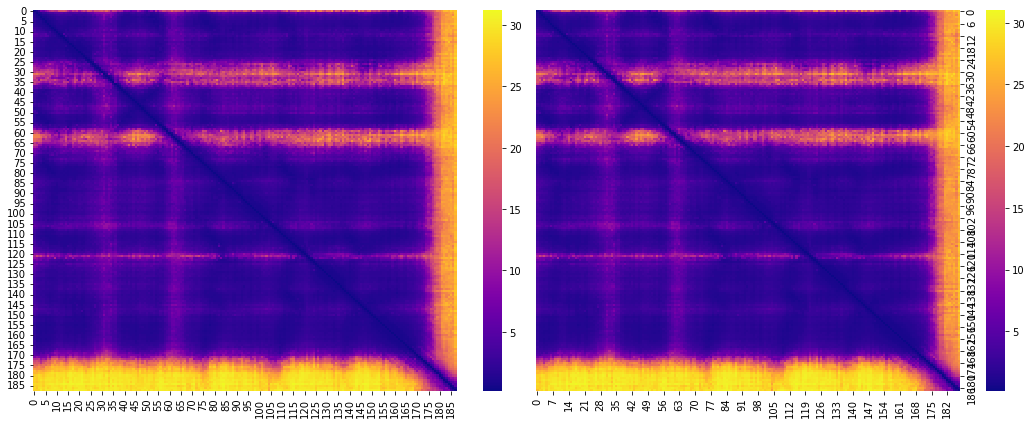

In [3]:
p1.plot_pae(p2)

It is also possible to substract both individual heatmaps and show the result of said substraction, mostly to have an easier time comparing. Of course, you need to pass along another protein for the parameter to work.

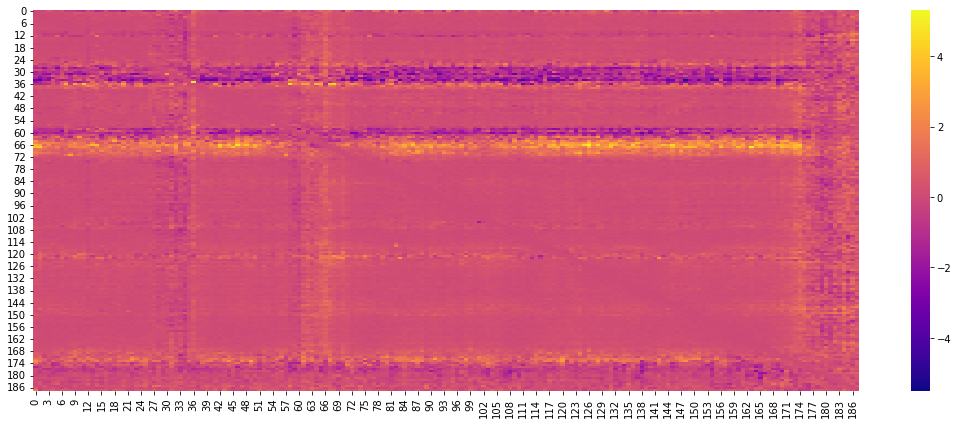

In [6]:
p1.plot_pae(p2, substract=True)

The predicted local distance difference test (pLDDT) score (0-100) is a per-residue __confidence score__, with values greater than 90 indicating high confidence, and values below 50 indicating low confidence. AlphaFoldXplore show this metric with a plot. 

This measure estimates whether the predicted residue has similar distances to neighboring C-alpha atoms (within 15 Angstroms) in agreement with distances in the true structure.

[Source](https://www.rbvi.ucsf.edu/chimerax/data/pae-apr2022/pae.html)

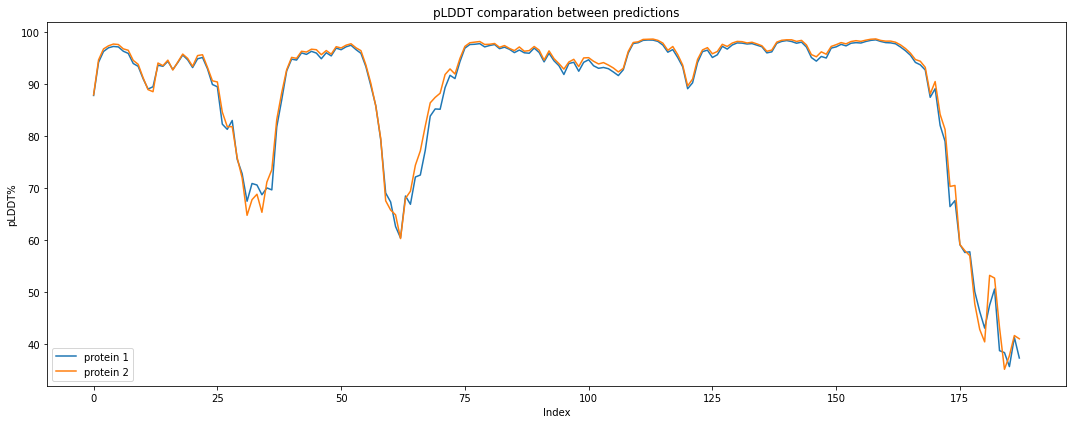

In [11]:
p1.plot_plddt(p2)

“Root Mean Square Deviation” (RMSD) is a comparison metric which measures the real distance between the same residue position on two different proteins. It is often used to determine, for example, structural differences between two oncogenic proteins.

For this command to work, you must pass along another protein, and both must be of the same length.

However, since predictions can slightly vary their structural position due to each individual prediction being different, it is reccomended to superimpose or "fit" your model protein along a sample one before measuring their RMSD.

Store the newly superimposed protein on a variable to be able to use it.

In [16]:
p2_fit = p1.fit(p2)

Mean RMSD from the superimposition is:
0.6710286186603511 Å
updating: superimposed_NP_004976.2 G13D GTPase KRas isoform b [Homo sapiens]_unrelaxed.pdb (deflated 78%)


/Users/juanignacio/opt/anaconda3/envs/test/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1503
  warnings.warn(
/Users/juanignacio/opt/anaconda3/envs/test/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1507
  warnings.warn(


With the superimposition made, you can now view the RMSD between two proteins.

/Users/juanignacio/opt/anaconda3/envs/test/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1503
  warnings.warn(


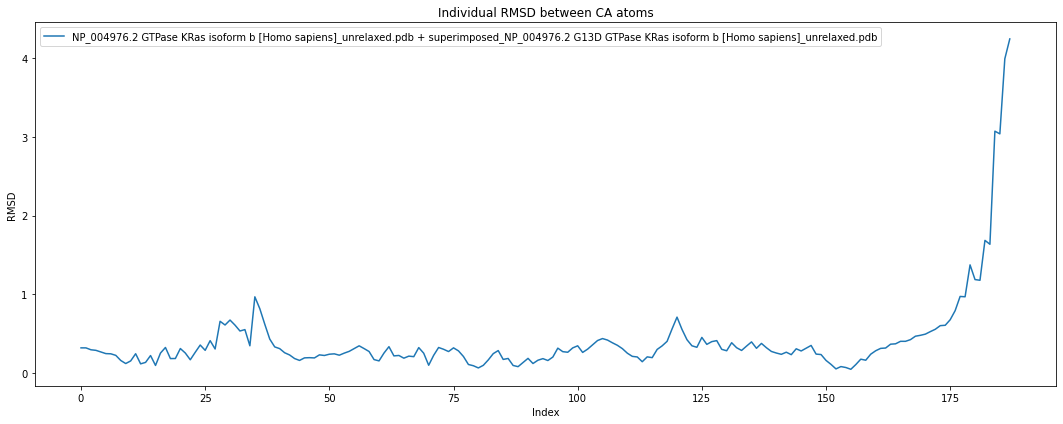

Mean RMSD:
0.6710173350795479 Å


In [18]:
rmsd_fit = p1.rmsd(p2_fit)

It is also possible to determine start and end positions to focus on a particular section of the plot. Please note that the index position does not get saved.

/Users/juanignacio/opt/anaconda3/envs/test/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1503
  warnings.warn(


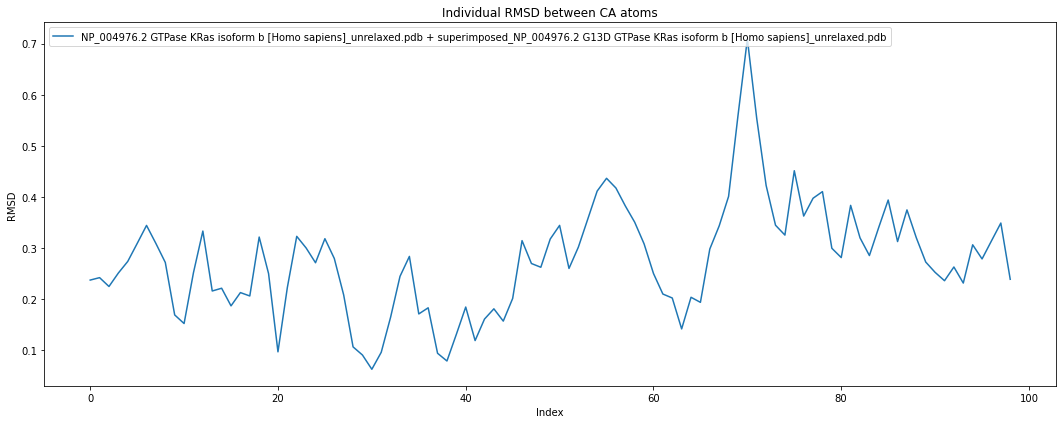

Mean RMSD:
0.2955405001944668 Å


In [21]:
rmsd_fit = p1.rmsd(p2_fit, start=50, end=150)